In [4]:
from matplotlib import pylab as plt
import numpy as np

def plot_image(img=None, cmap='gray', interpolation='nearest', figsize=(3,3)):
    '''Plot input image img'''
    plt.figure(figsize=figsize)
    plt.xticks([]) # disable x-axis ticks and labels
    plt.yticks([]) # disable y-axis ticks and labels
    if img is not None:
        plt.imshow(img, cmap=plt.get_cmap(cmap), interpolation=interpolation)
    else:
        plt.imshow(self.img, cmap=plt.get_cmap(cmap), interpolation=interpolation)

In [6]:
def read_image(path):
    '''Read image from local path or URL in the input path
       Returns: image as a nested list
    '''
    from imageio.v2 import imread
    if isinstance(path, str):
        try:
            img = imread(path)
            return img
        except:
            print('Could not read the image at path:', path)
    else:
        print('input path must be a string, not', path)


In [8]:
def plot_prettier(dpi=150, fontsize=11, usetex=False): 
    '''
    Make plots look nicer compared to Matplotlib defaults
    Parameters: 
        dpi - int, "dots per inch" - controls resolution of PNG images that are produced
                by Matplotlib
        fontsize - int, font size to use overall
        usetex - bool, whether to use LaTeX to render fonds of axes labels 
                use False if you don't have LaTeX installed on your system
    '''
    plt.rcParams['figure.dpi']= dpi
    plt.rc("savefig", dpi=dpi)
    plt.rc('font', size=fontsize)
    plt.rc('xtick', direction='in') 
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=5) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=5) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [2., 2.])
    if usetex:
        plt.rc('text', usetex=usetex)
    else:
        plt.rcParams['mathtext.fontset'] = 'cm'
        plt.rcParams['font.family'] = 'serif'
        plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

        
plot_prettier()



<font size=4 color='black'>Implementing a random number generator class</font> 

Given function prng. Then, plotting histograms of the million random integer and float numbers generated using Matplotlib. 

In [11]:
def prng(x, a=4645906587823291368, m=2**63-5):
    '''
    a pseudo-random number generator that uses the Permuted Linear Congruential Generator approach
    '''
    # adjust the shift to the bit length of input int
    nshift = int(0.85*x.bit_length()) 
    x = (x >> (x >> nshift))^x
    return (x * a) % m

# import system time counter in integer nanoseconds
from time import perf_counter_ns

# use current counter count as random seed of the generator
x = int(perf_counter_ns()) 

# generate the first 10 random numbers in the sequence
for i in range(10):
    print(x := prng(x))

9044344975724901093
4453190419712332062
7788588769443671007
8761962038904092076
8152222321872395394
7561515571886749959
9015680131896448110
4799074725589009269
79762399654113024
9057304544477992587


235930343136958
2023
2295297491592362844
8473809362388784467
8438188478820147723
6415214448233812719
8640884502331789569
1007206305237882123
7173630165615918099
761113212935008110
1513463039193509322
1440139350157524801
10 99
10.00000351691207 99.99997742051852


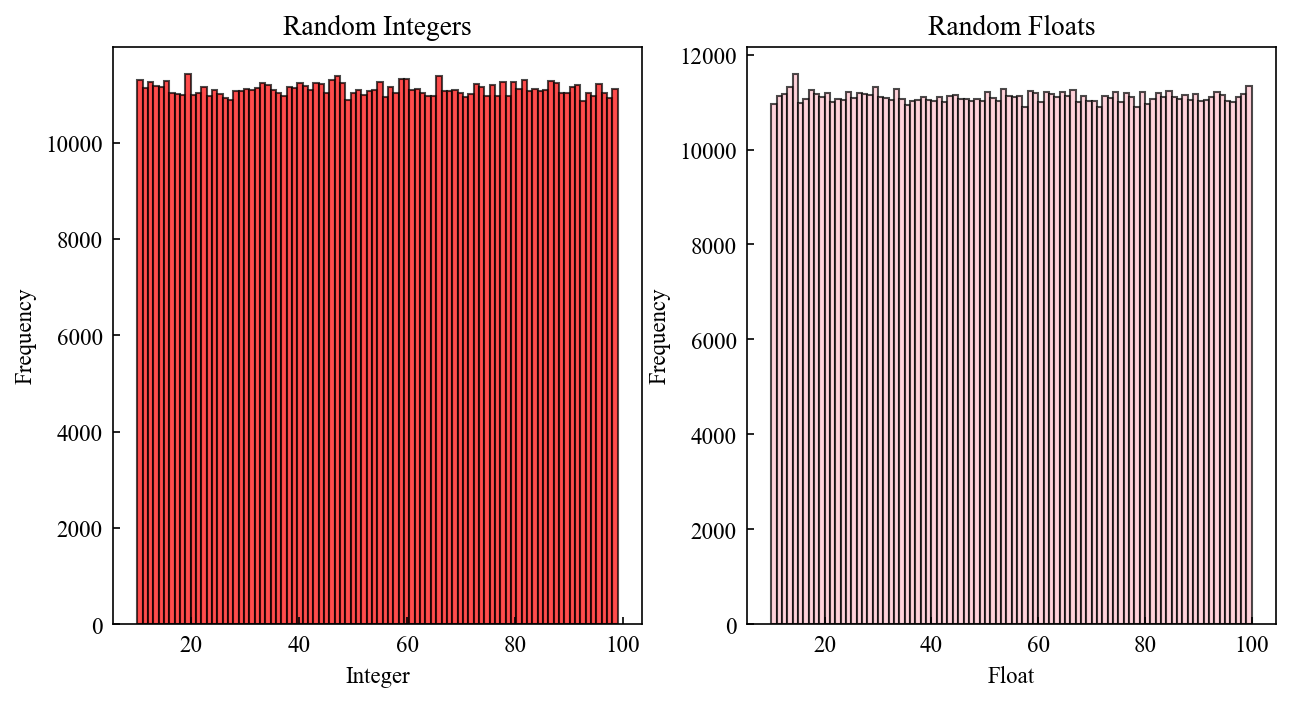

In [13]:
class PRNG:
    def __init__(self, seed = None):
        self.r = seed if seed is not None else int(perf_counter_ns())
        self.m = 2**63-5
    def prng(self, seed, a=4645906587823291368, m=2**63-5):
        nshift = int(0.85*seed.bit_length()) 
        seed = (seed >> (seed >> nshift))^seed
        return (seed * a) % m
    def __call__(self):
        self.r = self.prng(self.r, m = self.m)
        return self.r
    def integers(self, low, high, size):
        random_ints = np.empty(size, dtype = int)
        for i in range(size):
            random = self()
            random_ints[i] = int(random/self.m * (high-low) + low)
        return random_ints
    def random(self, low, high, size):
        random_floats = np.empty(size, dtype = float)
        for i in range(size):
            rand = self()
            random_floats[i] = rand/self.m * (high-low) + low 
        return random_floats

rng = PRNG()
print(rng.r)

rng = PRNG(seed=2023)
print(rng.r)

for i in range(10):
    print(rng())

rints = rng.integers(low=10, high=100, size=1000000)

print(rints.min(), rints.max())

rfloats = rng.random(low=10., high=100., size=1000000)

print(rfloats.min(), rfloats.max())

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(rints, bins=90, color='red', alpha=0.7, edgecolor='black')
plt.title("Random Integers")
plt.xlabel("Integer")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(rfloats, bins=90, color='pink', alpha=0.7, edgecolor='black')
plt.title("Random Floats")
plt.xlabel("Float")
plt.ylabel("Frequency")

plt.show()